# Detrending data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import statsmodels.api as sm

## Get the data

In [3]:
data = pd.read_excel('GDP_data.xls', 'Quarterly', index_col=0, parse_dates=True)

In [4]:
data

,FGCEC1,GCEC1,GDPC1,GPDIC1,NETEXC,PCECC96,PNFIC1
DATE,,,,,,,
1947-01-01,NaN,524.076,2033.061,218.091,NaN,1274.952,NaN
1947-04-01,NaN,523.632,2027.639,201.386,NaN,1296.163,NaN
1947-07-01,NaN,523.527,2023.452,195.461,NaN,1300.388,NaN
1947-10-01,NaN,519.285,2055.103,233.284,NaN,1300.801,NaN
1948-01-01,NaN,527.020,2086.017,257.220,NaN,1307.283,NaN
...,...,...,...,...,...,...,...
2020-01-01,1306.142,3347.857,19010.848,3333.963,-788.011,13118.406,2733.811
2020-04-01,1356.816,3368.732,17302.511,2849.792,-775.050,11860.250,2525.548
2020-07-01,1335.133,3327.203,18596.521,3329.625,-1019.020,12924.721,2659.008


In [5]:
names = {"FGCEC1": "FG",
         "GCEC1": "G",
         "GDPC1": "Y",
         "GPDIC1": "I",
         'NETEXC':'NX',
         'PCECC96':'C',
         'PNFIC1':'IN'}
data.rename(columns=names, inplace=True)

In [6]:
data

,FG,G,Y,I,NX,C,IN
DATE,,,,,,,
1947-01-01,NaN,524.076,2033.061,218.091,NaN,1274.952,NaN
1947-04-01,NaN,523.632,2027.639,201.386,NaN,1296.163,NaN
1947-07-01,NaN,523.527,2023.452,195.461,NaN,1300.388,NaN
1947-10-01,NaN,519.285,2055.103,233.284,NaN,1300.801,NaN
1948-01-01,NaN,527.020,2086.017,257.220,NaN,1307.283,NaN
...,...,...,...,...,...,...,...
2020-01-01,1306.142,3347.857,19010.848,3333.963,-788.011,13118.406,2733.811
2020-04-01,1356.816,3368.732,17302.511,2849.792,-775.050,11860.250,2525.548
2020-07-01,1335.133,3327.203,18596.521,3329.625,-1019.020,12924.721,2659.008


<AxesSubplot:xlabel='DATE'>

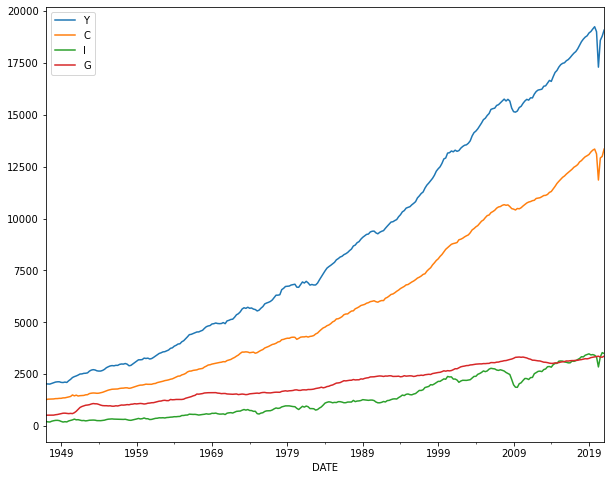

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
data[['Y','C','I','G']].plot(ax=ax, legend='upper left')

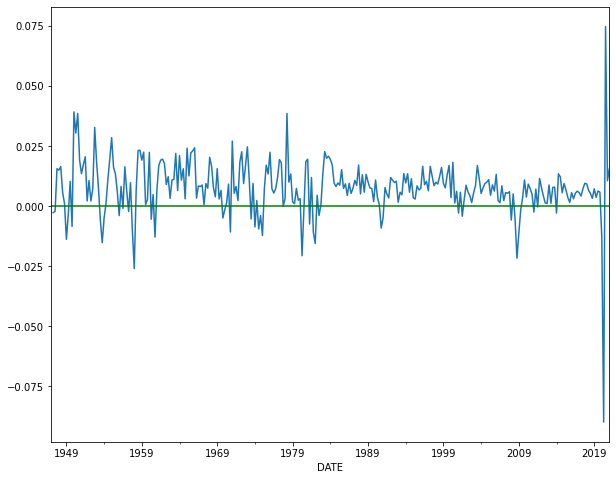

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
data['Y'].pct_change().plot(ax=ax)
ax.axhline(color='g')

In [10]:
hpcycle, hptrend = sm.tsa.filters.hpfilter(data['Y'])

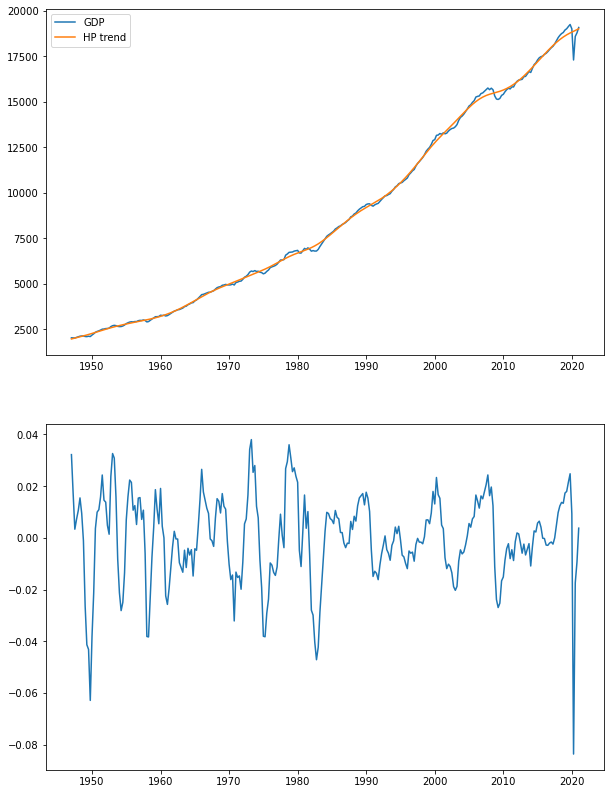

In [11]:
fig, ax = plt.subplots(2,1,figsize=(10,14))
ax[0].plot(data['Y'],label='GDP')
ax[0].plot(hptrend,label='HP trend')
ax[0].legend()
ax[1].plot(hpcycle/hptrend,label='cyclical components')
plt.show()

In [12]:
dtsmall = data[['Y','C','I','G','NX']]

In [13]:
bkcycle = sm.tsa.filters.bkfilter(data['Y'])
bktrend = dtsmall['Y']-bkcycle

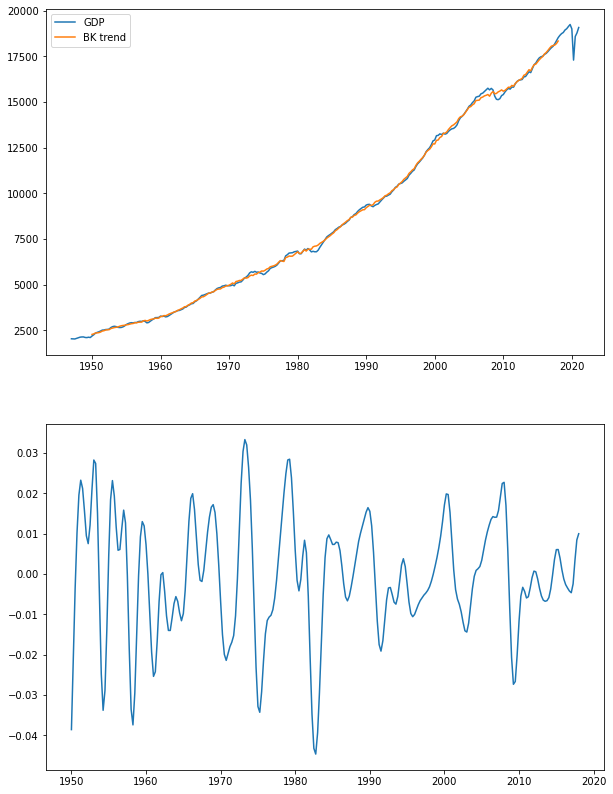

In [14]:
fig, ax = plt.subplots(2,1,figsize=(10,14))
ax[0].plot(data['Y'],label='GDP')
ax[0].plot(bktrend,label='BK trend')
ax[0].legend()
ax[1].plot(bkcycle/bktrend,label='cyclical components')
plt.show()